# Assignment 9B- Hasanat Hasan

## Problem 1 (30 points): Monte Carlo Estimation in Low Dimensions 
### Use the mean-value method, as explained in Lecture 8, to estimate the volume of a unit hypersphere for dimensions d = 2 and d = 10. The volume can be expressed as the integral:
$$
V_d = \int_{[-1,1]^d}  f(x) d^dx
$$
### where $f(x) = 1$ inside the hypersphere $(\sum_{i=1}^d x_i^2 \leq 1) $ and 0 otherwise.
- ### Compute the volume using the Monte Carlo mean-value estimate:;
$$
V_d \approx V_{\text{cube}}\langle f \rangle \text{ where } V_{\text{cube}} = 2^d
$$
- ### Compute the statistical uncertainty and compare your results with the exact formula. Discuss the accuracy of your estimate.

# Utilities:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

def MonteCarlo_integrate(integrand: callable,
                         Volume: float,
                         x_array: np.ndarray):
    ''' 
    Estimates integrals of non-analytic functions using \n
    Monte-Carlo Integration with uniform sampling.
    
    Note: Input to integrand function must be an array.\n 
    this code efficent computes the itergal using vectorized operations
    '''                         
    x_i: np.ndarray = x_array
    Fx_i_mean = np.mean(integrand(x_i))
    estimate = np.abs(Volume) * Fx_i_mean
    return estimate, Fx_i_mean

def Fx_sqr(x_vals: np.ndarray) -> np.ndarray:
    """
    Vectorized calculation of f(X)^2 = 1, for \sum X_i^2 <= 1 
    """
    return Fx(x_vals)**2 #np.where(np.sum(x_vals**2, axis=0) <= 1, 1, 0)

def Fx(x_vals: np.ndarray) -> np.ndarray:
    """
    Vectorized calculation of  f(X) = 1, for \sum X_i^2 <= 1 
    """
    return np.where(np.sum(x_vals**2, axis=0) <= 1, 1, 0)

def calc_stdev(Volume: float,
               samples: int,
               expected_val: float,
               expected_square: float):
    ''' 
    Calculates the standard deviation in the integral estimate
    '''
    exp_val: float = expected_val
    exp_sq: float = expected_square
    coeff: float = np.abs(Volume)/(np.sqrt(samples)) 
    stdev: float = coeff * np.sqrt(exp_sq - (exp_val)**2 )
    return stdev

def HyperCube_Volume(dimension: int)-> int:
    ''' 
    volume of ND hypercube
    '''
    return 2**dimension

def HyperSphere_Volume(dimension: int):
    ''' 
    volume of ND hyper sphere
    '''
    return np.pi**(dimension / 2) / scipy.special.gamma(dimension / 2 + 1)

## 2D Volume Comparsion

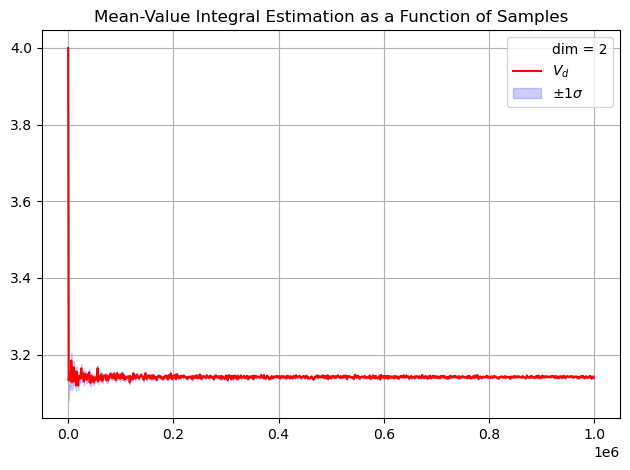

In [ ]:
sample_max = 10**6
sample_step = 10**3
samples_list = list(range(5, sample_max + 1, sample_step))
stdev_list = np.zeros((len(samples_list)))
estimation_list = np.zeros((len(samples_list)))
start = -1
end = 1
dimension = 2

for idx,samples in enumerate(samples_list):
    Volume = HyperCube_Volume(dimension)
    x_array = np.random.uniform(start, end, (dimension, samples))
    integral, Fx_mean = MonteCarlo_integrate(Fx, Volume, x_array)
    integral_sqr, Fx_sqr_mean = MonteCarlo_integrate(Fx_sqr, Volume, x_array)
    stdev = calc_stdev(Volume,samples,Fx_mean,Fx_sqr_mean)
    stdev_list[idx] = stdev
    estimation_list[idx] = integral

volume_sphere = HyperSphere_Volume(dimension)
plt.title(f"Mean-Value Integral Estimation as a Function of Samples")
plt.plot([], [], ' ', label=rf"dim = {dimension}")  # ' ' ensures no visible marker or line
plt.plot(samples_list, estimation_list, color='r', label=rf"$V_d$")
plt.axhline(y=volume_sphere, color='r', linestyle='--', label="True Volume")
plt.fill_between(
    samples_list,
    estimation_list - stdev_list,
    estimation_list + stdev_list,
    color='blue',
    alpha=0.2,
    label=r"$\pm 1\sigma$"
)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 10D Volume comparison:

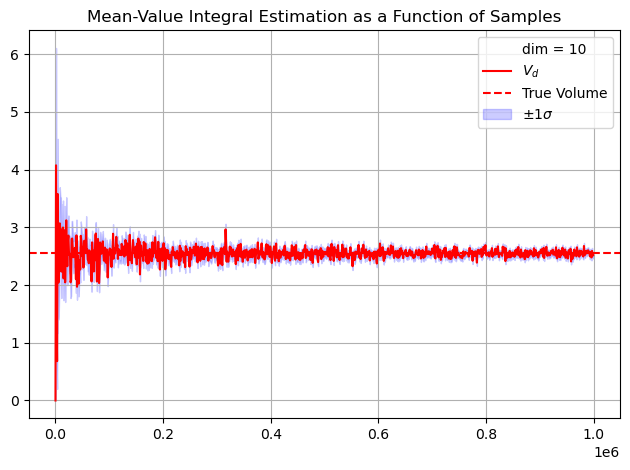

In [ ]:
sample_max = 10**6
sample_step = 10**3
samples_list = list(range(5, sample_max + 1, sample_step))
stdev_list = np.zeros((len(samples_list)))
estimation_list = np.zeros((len(samples_list)))
start = -1
end = 1
dimension = 10

for idx,samples in enumerate(samples_list):
    Volume = HyperCube_Volume(dimension)
    x_array = np.random.uniform(start, end, (dimension, samples))
    integral, Fx_mean = MonteCarlo_integrate(Fx, Volume, x_array)
    integral_sqr, Fx_sqr_mean = MonteCarlo_integrate(Fx_sqr, Volume, x_array)
    stdev = calc_stdev(Volume,samples,Fx_mean,Fx_sqr_mean)
    stdev_list[idx] = stdev
    estimation_list[idx] = integral

volume_sphere = HyperSphere_Volume(dimension)
plt.title(f"Mean-Value Integral Estimation as a Function of Samples")
plt.plot([], [], ' ', label=rf"dim = {dimension}")  # ' ' ensures no visible marker or line
plt.plot(samples_list, estimation_list, color='r', label=rf"$V_d$")
plt.axhline(y=volume_sphere, color='r', linestyle='--', label="True Volume")
plt.fill_between(
    samples_list,
    estimation_list - stdev_list,
    estimation_list + stdev_list,
    color='blue',
    alpha=0.2,
    label=r"$\pm 1\sigma$"
)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Problem 2 (20 points): High-Dimensional Effects and the Curse of Dimensionality
### Repeat the Monte Carlo calculation for $d = 15 $ and $d = 20$, using the same number of samples. Compare your estimates with the exact formula and analyze how the relative error changes as d increases.
### Explain why Monte Carlo integration becomes increasingly unreliable as d increases and relate your observations to the curse of dimensionality.


# Utilites

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

def MonteCarlo_integrate(integrand: callable,
                         Volume: float,
                         x_array: np.ndarray):
    ''' 
    Estimates integrals of non-analytic functions using \n
    Monte-Carlo Integration with uniform sampling.
    
    Note: Input to integrand function must be an array.\n 
    this code efficent computes the itergal using vectorized operations
    '''                         
    x_i: np.ndarray = x_array
    Fx_i_mean = np.mean(integrand(x_i))
    estimate = np.abs(Volume) * Fx_i_mean
    return estimate, Fx_i_mean

def Fx_sqr(x_vals: np.ndarray) -> np.ndarray:
    """
    Vectorized calculation of f(X)^2 = 1, for \sum X_i^2 <= 1 
    """
    return Fx(x_vals)**2 #np.where(np.sum(x_vals**2, axis=0) <= 1, 1, 0)

def Fx(x_vals: np.ndarray) -> np.ndarray:
    """
    Vectorized calculation of  f(X) = 1, for \sum X_i^2 <= 1 
    """
    return np.where(np.sum(x_vals**2, axis=0) <= 1, 1, 0)

def calc_stdev(Volume: float,
               samples: int,
               expected_val: float,
               expected_square: float):
    ''' 
    Calculates the standard deviation in the integral estimate
    '''
    exp_val: float = expected_val
    exp_sq: float = expected_square
    coeff: float = np.abs(Volume)/(np.sqrt(samples)) 
    stdev: float = coeff * np.sqrt(exp_sq - (exp_val)**2 )
    return stdev

def HyperCube_Volume(dimension: int)-> int:
    ''' 
    volume of ND hypercube
    '''
    return 2**dimension

def HyperSphere_Volume(dimension: int):
    ''' 
    volume of ND hyper sphere
    '''
    return np.pi**(dimension / 2) / scipy.special.gamma(dimension / 2 + 1)

# $D = 15$

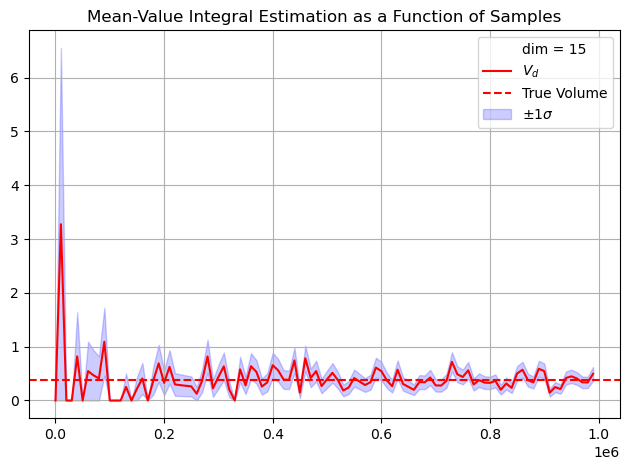

In [46]:
sample_max = 10**6
sample_step = 10**4
samples_list = list(range(5, sample_max + 1, sample_step))
stdev_list = np.zeros((len(samples_list)))
estimation_list = np.zeros((len(samples_list)))
start = -1
end = 1
dimension = 15

for idx,samples in enumerate(samples_list):
    Volume = HyperCube_Volume(dimension)
    x_array = np.random.uniform(start, end, (dimension, samples))
    integral, Fx_mean = MonteCarlo_integrate(Fx, Volume, x_array)
    integral_sqr, Fx_sqr_mean = MonteCarlo_integrate(Fx_sqr, Volume, x_array)
    stdev = calc_stdev(Volume,samples,Fx_mean,Fx_sqr_mean)
    stdev_list[idx] = stdev
    estimation_list[idx] = integral

volume_sphere = HyperSphere_Volume(dimension)
plt.title(f"Mean-Value Integral Estimation as a Function of Samples")
plt.plot([], [], ' ', label=rf"dim = {dimension}")  # ' ' ensures no visible marker or line
plt.plot(samples_list, estimation_list, color='r', label=rf"$V_d$")
plt.axhline(y=volume_sphere, color='r', linestyle='--', label="True Volume")
plt.fill_between(
    samples_list,
    estimation_list - stdev_list,
    estimation_list + stdev_list,
    color='blue',
    alpha=0.2,
    label=r"$\pm 1\sigma$"
)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# $D = 20$

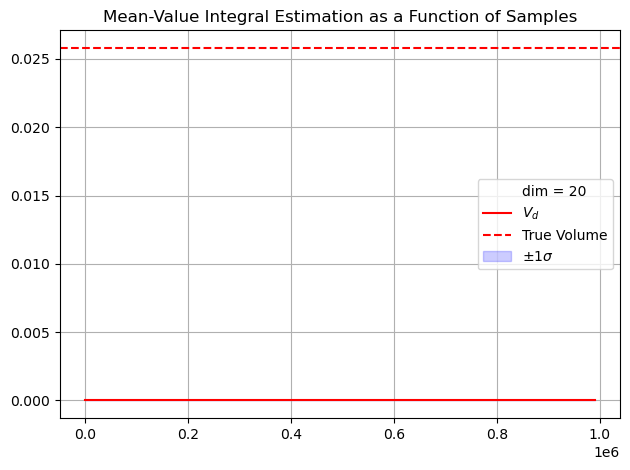

In [51]:
sample_max = 10**6
sample_step = 10**4
samples_list = list(range(5, sample_max + 1, sample_step))
stdev_list = np.zeros((len(samples_list)))
estimation_list = np.zeros((len(samples_list)))
start = -1
end = 1
dimension = 20

for idx,samples in enumerate(samples_list):
    Volume = HyperCube_Volume(dimension)
    x_array = np.random.uniform(start, end, (dimension, samples))
    integral, Fx_mean = MonteCarlo_integrate(Fx, Volume, x_array)
    integral_sqr, Fx_sqr_mean = MonteCarlo_integrate(Fx_sqr, Volume, x_array)
    stdev = calc_stdev(Volume,samples,Fx_mean,Fx_sqr_mean)
    stdev_list[idx] = stdev
    estimation_list[idx] = integral

volume_sphere = HyperSphere_Volume(dimension)
plt.title(f"Mean-Value Integral Estimation as a Function of Samples")
plt.plot([], [], ' ', label=rf"dim = {dimension}")  # ' ' ensures no visible marker or line
plt.plot(samples_list, estimation_list, color='r', label=rf"$V_d$")
plt.axhline(y=volume_sphere, color='r', linestyle='--', label="True Volume")
plt.fill_between(
    samples_list,
    estimation_list - stdev_list,
    estimation_list + stdev_list,
    color='blue',
    alpha=0.2,
    label=r"$\pm 1\sigma$"
)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Due to the curse of dimensionality, the volume ratio: $\frac{V_d}{V_{\text{cube}}}$ quickly approaches 0 as the dimension increases, meaning that $V_{\text{cube}} \gg V_d$. In the monte-carlo mean-value method, we sample the state space uniformly within a range, and this uniform sampling combined with $V_{\text{cube}} \gg V_d$ means that for high dimensions, we are very unlikely to sample a point within the range of $f(x)$, which why for $D=20$, the mean-value method calculates a volume of 0 at dimension 20, when it is actually ~0.025.